# 資料新增刪除轉換與取代
+ DdataFrame的新增
+ DdataFrame的刪除
+ 資料轉換處理包含
  + 資料取代
  + 資料分析後轉換
+ 資料取代
  + 可使用 replace 方式來替換指定的值
+ Column 的索引值名稱變更
  + df=df.rename(columns={'原來名稱':'新的名稱'})  

## 資料新增(補充)

In [2]:
import pandas as pd
data = [[1,2,3],[4,5,6]]
index = ['a','b']
columns = ['A','B','C']
df = pd.DataFrame(data=data,index=index,columns=columns)
print(df)
df.index = ["x","y"]# 修改index
print("================")
print(df)
print("======新增1個row==========")
df.loc['c'] = [9,11,12]
print(df)
print("======新增n個row==========")
df2 = pd.DataFrame([[20,21,22],[23,24,25]],index=["d","e"],columns=["A","B","C"])
print(df2)
df3 = pd.concat([df,df2])
print(df3)
print("======新增1個colum==========")
df["D"] = [31,38,32]
print(df)
print("======新增1個 名為mean的colum==========")
df2 = df.assign(mean=df.mean(axis=1))
print(df2)
print("======新增n個colum==========")
df4 = pd.DataFrame([[51,52,53],[61,62,63],[71,72,73]],index=['x','y','c'],columns=["G","H","J"])
df5 = pd.concat([df,df4],axis=1)
print(df5)

   A  B  C
a  1  2  3
b  4  5  6
   A  B  C
x  1  2  3
y  4  5  6
======新增1個row==========
   A   B   C
x  1   2   3
y  4   5   6
c  9  11  12
======新增n個row==========
    A   B   C
d  20  21  22
e  23  24  25
    A   B   C
x   1   2   3
y   4   5   6
c   9  11  12
d  20  21  22
e  23  24  25
======新增1個colum==========
   A   B   C   D
x  1   2   3  31
y  4   5   6  38
c  9  11  12  32
======新增1個 名為mean的colum==========
   A   B   C   D   mean
x  1   2   3  31   9.25
y  4   5   6  38  13.25
c  9  11  12  32  16.00
======新增n個colum==========
   A   B   C   D   G   H   J
x  1   2   3  31  51  52  53
y  4   5   6  38  61  62  63
c  9  11  12  32  71  72  73


## 刪除資料(補充)

In [51]:
import pandas as pd
data1={"Score1":[72,55,43],"Score2":[92,65,84]}
df = pd.DataFrame(data1,index=["A","B","C"])
print(df)
# 預設axis為0
df2 = df.drop("B",axis=0) #刪除row
print("====================")
print(df2)
print("====================")
df2 = df.drop("Score2",axis=1)#刪除colum
print(df2)
print("====================")
df.drop("Score2",axis=1,inplace=True)#刪除colum
print(df)

   Score1  Score2
A      72      92
B      55      65
C      43      84
   Score1  Score2
A      72      92
C      43      84
   Score1
A      72
B      55
C      43
   Score1
A      72
B      55
C      43
A    72
B    55
C    43
Name: Score1, dtype: int64


In [2]:
import pandas as pd
df = pd.DataFrame([[1,2,3,4,5,6],
                   [10,11,12,13,14,15],
                  [20,21,22,23,24,25]],index=["Ken","Vivin","Lucy"],columns=["A","B","C","D","E","F"])
print(df)
print("========================")
df2 = df.drop(["A","D","E"],axis=1)#移除多colum
print(df2)
df2 = df.drop(df.index[1:3])#移除多row
print(df2)

        A   B   C   D   E   F
Ken     1   2   3   4   5   6
Vivin  10  11  12  13  14  15
Lucy   20  21  22  23  24  25
        B   C   F
Ken     2   3   6
Vivin  11  12  15
Lucy   21  22  25
     A  B  C  D  E  F
Ken  1  2  3  4  5  6


## replace(補)

In [32]:
import pandas as pd
df = pd.DataFrame([[85,59],[25,59],[80,51]],index=['A','B','C'],columns=['Score1','Score2'])
print(df)
print("===========================")
df = df.replace(59,60)# 所以59換成60
print(df)
print("===========================")
df2 = pd.DataFrame([["PM","Lumiy"],["NaN","Motorola"],["RD","Null"]],index=['A','B','C'],columns=['Title','Company'])
print(df2)
print("===========================")
df2.replace(to_replace=r"NaN|Null",value="ERROR",regex=True,inplace=True)

print(df2)

   Score1  Score2
A      85      59
B      25      59
C      80      51
   Score1  Score2
A      85      60
B      25      60
C      80      51
  Title   Company
A    PM     Lumiy
B   NaN  Motorola
C    RD      Null
   Title   Company
A     PM     Lumiy
B  ERROR  Motorola
C     RD     ERROR


## Column 的索引值名稱變更(補)

In [7]:
import pandas as pd
df = pd.DataFrame([[85,59],[25,59],[80,51]],index=['A','B','C'],columns=['Score1','Score2'])
print(df)
df = df.rename(columns={"Score1":"成績1"})
print("==================")
print(df)
df = df.rename(index={"A":"A+"})
print("==================")
print(df)

   Score1  Score2
A      85      59
B      25      59
C      80      51
   成績1  Score2
A   85      59
B   25      59
C   80      51
    成績1  Score2
A+   85      59
B    25      59
C    80      51


## 資料分析轉換
+ Series 的 map 方法可以接受一個函數或含有 map 關係的字典型資訊。
+ 使用 map 是一種實現元素轉換以及其他資訊清理工作的方式。 
+ 可以搭配 Series 或 dict、匿名函數與一般函數作業。

In [1]:
import pandas as pd
s1 = pd.Series(range(10))
s2=s1.map(lambda x:x+10)
s3=s1.map(lambda x:x*-1)
print(s1)
print("--------------")
print(s2)
print("--------------")
print(s3)
print("--------------")

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64
--------------
0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64
--------------
0    0
1   -1
2   -2
3   -3
4   -4
5   -5
6   -6
7   -7
8   -8
9   -9
dtype: int64
--------------


In [9]:
import pandas as pd
x = pd.Series([1,2,3], index=['one', 'two', 'three'])
y = pd.Series(['foo', 'bar', 'baz'], index=[1,2,3])#可以把index當作key
x1=x.map(y) #y的index對上 x的value 決定要換置的數值 在x內 value是1 index:one 在y內value是foo index是1
# y的index跟 x的value對上了 把x的value換成y的value 
z = {1: 'A', 2: 'B', 3: 'C'}
x2=x.map(z) # dict內容 key為1 對上 x的value為1的正好取代 x　的value變為A
print(x)
print("--------------")
print(y)
print("--------------")
print(x1)
print("--------------")
print(x2)
print("--------------")
print(z)
print("--------------")

one      1
two      2
three    3
dtype: int64
--------------
1    foo
2    bar
3    baz
dtype: object
--------------
one      foo
two      bar
three    baz
dtype: object
--------------
one      A
two      B
three    C
dtype: object
--------------
{1: 'A', 2: 'B', 3: 'C'}
--------------


In [17]:
import pandas as pd
data = pd.DataFrame({'food':['bacon','pulled pork','bacon','Pastrami',
            'Corned beef','Bacon','pastrami','honey ham','nova lox'],
                  'ounces':[4,3,12,6,7.5,8,3,5,6]})
print(data)
print("=========================")
print(type(data['food']))
print("=========================")
meat_to_animal = {
    'bacon':'pig', 'pulled pork':'pig',
    'pastrami':'cow','corned beef':'cow',
    'honey ham':'pig', 'nova lox':'salmon' }
data['animal'] = data['food'].map(str.lower).map(meat_to_animal) # 建立一組新的animal欄位 將修改後的數值寫入
# 假設有一組需求 須建立food 對映 animal的關係
print("=========================")
print(data)


          food  ounces
0        bacon     4.0
1  pulled pork     3.0
2        bacon    12.0
3     Pastrami     6.0
4  Corned beef     7.5
5        Bacon     8.0
6     pastrami     3.0
7    honey ham     5.0
8     nova lox     6.0
<class 'pandas.core.series.Series'>
          food  ounces  animal
0        bacon     4.0     pig
1  pulled pork     3.0     pig
2        bacon    12.0     pig
3     Pastrami     6.0     cow
4  Corned beef     7.5     cow
5        Bacon     8.0     pig
6     pastrami     3.0     cow
7    honey ham     5.0     pig
8     nova lox     6.0  salmon


In [2]:
import pandas as pd
indexdate = pd.date_range('2018-09-25', periods=10)
print("--------------")
s1 = pd.Series(list(range(10)), index=indexdate)
s2=s1.index.map(lambda x: x.day) # 改變index為day
s3=s1.index.map(lambda x: x.weekday) # 改變index為星期幾 0是周一
s4=s1.map(lambda x: x+10) # 把value + 10
def f(x):
    if x < 5:
        return True
    else:
        return False
s5=s1.map(f)
s6 = pd.Series(list(range(10)), index=indexdate)
print(s1)
print("--------------")
print(s2)
print("--------------")
print(s3)
print("--------------")
print(s4)
print("--------------")
print(s5)
print("--------------")
print(s6)
print("--------------")
s6.index = s2 #將index換成day
print(s6)
print("--------------")

--------------
2018-09-25    0
2018-09-26    1
2018-09-27    2
2018-09-28    3
2018-09-29    4
2018-09-30    5
2018-10-01    6
2018-10-02    7
2018-10-03    8
2018-10-04    9
Freq: D, dtype: int64
--------------
Int64Index([25, 26, 27, 28, 29, 30, 1, 2, 3, 4], dtype='int64')
--------------
Int64Index([1, 2, 3, 4, 5, 6, 0, 1, 2, 3], dtype='int64')
--------------
2018-09-25    10
2018-09-26    11
2018-09-27    12
2018-09-28    13
2018-09-29    14
2018-09-30    15
2018-10-01    16
2018-10-02    17
2018-10-03    18
2018-10-04    19
Freq: D, dtype: int64
--------------
2018-09-25     True
2018-09-26     True
2018-09-27     True
2018-09-28     True
2018-09-29     True
2018-09-30    False
2018-10-01    False
2018-10-02    False
2018-10-03    False
2018-10-04    False
Freq: D, dtype: bool
--------------
2018-09-25    0
2018-09-26    1
2018-09-27    2
2018-09-28    3
2018-09-29    4
2018-09-30    5
2018-10-01    6
2018-10-02    7
2018-10-03    8
2018-10-04    9
Freq: D, dtype: int64
-----------

## Apply

In [2]:
import pandas as pd
def test(dataf):
    print(dataf)
data = pd.DataFrame({'food':['bacon','pulled pork','bacon','Pastrami',
            'Corned beef','Bacon','pastrami','honey ham','nova lox'],
                  'ounces':[4,3,12,6,7.5,8,3,5,6]})
print(data)
print("=========================")
data['food-ounces']=data.apply(lambda dataf:f"{dataf['food']}-{dataf['ounces']}",axis=1 )
print("=========================")
print(data)

          food  ounces
0        bacon     4.0
1  pulled pork     3.0
2        bacon    12.0
3     Pastrami     6.0
4  Corned beef     7.5
5        Bacon     8.0
6     pastrami     3.0
7    honey ham     5.0
8     nova lox     6.0
          food  ounces      food-ounces
0        bacon     4.0        bacon-4.0
1  pulled pork     3.0  pulled pork-3.0
2        bacon    12.0       bacon-12.0
3     Pastrami     6.0     Pastrami-6.0
4  Corned beef     7.5  Corned beef-7.5
5        Bacon     8.0        Bacon-8.0
6     pastrami     3.0     pastrami-3.0
7    honey ham     5.0    honey ham-5.0
8     nova lox     6.0     nova lox-6.0


# 分組
+ 可針對資料進行分組，然後對每組資料進行統計分析。
+ 分組運算過程：split → apply → combine
  + 拆解 split：依據規則進行拆解分組。
  + 應用 apply：每個分組運行計算規則處理。
  + 合併 combine：把每個分組的計算結果合併起來。
+ 可針對資料進行分組，然後對每組資料進行統計分析。
+ 分組運算過程：split → apply → combine
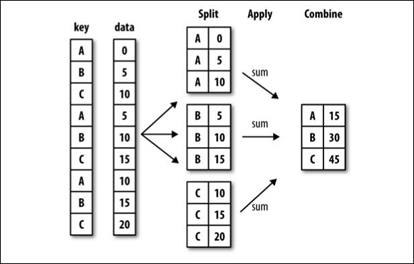
+ 可使用 groupby( ) 進行分組，而這動作並沒有進行實際運算，只是包含分組的資訊。
+ 物體可有多種切割方式：
  + df1.groupby('key')
  + df1.groupby(['key1','key2'])
  + df1.groupby(key,axis=1)

### 群組資料原型

In [3]:
import pandas as pd
import numpy as np
a = {'key1' : ['a', 'b', 'a', 'b', 'a', 'b', 'a', 'a'],
     'key2' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
     'data1': [2,3,4,5,6,7,8,1],
     'data2':[8,1,2,3,5,6,7,6]}
df1 = pd.DataFrame(a)
print(df1)
print("-------------------")


  key1   key2  data1  data2
0    a    one      2      8
1    b    one      3      1
2    a    two      4      2
3    b  three      5      3
4    a    two      6      5
5    b    two      7      6
6    a    one      8      7
7    a  three      1      6
-------------------


### 開始群組

In [28]:
import pandas025
df2=pandas025.df1
print(type(df2.groupby('key1')))
print(type(df2['data1'].groupby(df2['key1'])))
print((df2['data1'].groupby(df2['key1'])))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.groupby.generic.SeriesGroupBy'>


## 分組後的資料
+ 可針對分組後的資料進行分組計算，例如 mean( )。
+ 分組後將會傳回一組 tuple 資料，包含 group_name 與group_data，就可以做後續的運用。
+ get_group( ) 可得到指定的該組資訊。

In [15]:
import pandas025
df2=pandas025.df1
grouped2 = df2.groupby(['key1', 'key2'])
print("================")
print(grouped2.size( ))
print("================")
grouped3 =df2.groupby(['key2', 'key1']) #先用key2 群組 再用key1群組
print(grouped3.mean( )) #求出群組後的均值
print("================")
print(grouped3.mean( ).unstack()) #row 索引轉到colum
print("================")

key1  key2 
a     one      2
      three    1
      two      2
b     one      1
      three    1
      two      1
dtype: int64
            data1  data2
key2  key1              
one   a       5.0    7.5
      b       3.0    1.0
three a       1.0    6.0
      b       5.0    3.0
two   a       5.0    3.5
      b       7.0    6.0
      data1      data2     
key1      a    b     a    b
key2                       
one     5.0  3.0   7.5  1.0
three   1.0  5.0   6.0  3.0
two     5.0  7.0   3.5  6.0


### stack 與 unstack
+ stack
   + colum index轉為row index
+ unstack
  + row index轉為colum index

In [2]:
import pandas as pd
data = {"A":10,"B":15,"C":18,"D":25}
data2 = {"A":75,"B":83,"C":92,"D":63}
s1 = pd.Series(data)
s2 = pd.Series(data2)
df = pd.DataFrame({"colum1":s1,"colum2":s2},index=pd.Index(["A","B","C","D"],name="rowIndex"))
print(df)
print("============================")
dfs = df.stack()# colum index轉為row index
print(dfs)
print("============================")
print(dfs.unstack())# row index轉為colum index


          colum1  colum2
rowIndex                
A             10      75
B             15      83
C             18      92
D             25      63
rowIndex        
A         colum1    10
          colum2    75
B         colum1    15
          colum2    83
C         colum1    18
          colum2    92
D         colum1    25
          colum2    63
dtype: int64
          colum1  colum2
rowIndex                
A             10      75
B             15      83
C             18      92
D             25      63


## pandas025a的內容

In [12]:
import pandas025
df2=pandas025.df1
print("==========df2=================")
print(df2)
self_def_key = [0, 1, 2, 3, 3, 4, 5, 7]
print("===========================")
print(df2.groupby(self_def_key).size()) #群組自訂的Kye
print("=========key1==================")
print(df2['key1'])
print("==========key2=================")
print(df2['key2'])
print("==========groupby key2 key1=================")
print(df2.groupby([df2['key2'],df2['key1']]).size())
#print(df2.groupby(['key2','key1']).size())print("===========================")
print("============groupby('key1')mean===============")
grouped1 = df2.groupby('key1')
print(grouped1.mean()) #整組Dataframe 都群組key1 求平均值
print("===========================")
grouped2 = df2['data1'].groupby(df2['key1']) #針對data1 groupby key1
print(grouped2.mean())
print("===========================")
print(grouped2.mean()[1])

==========df2=================
  key1   key2  data1  data2
0    a    one      2      8
1    b    one      3      1
2    a    two      4      2
3    b  three      5      3
4    a    two      6      5
5    b    two      7      6
6    a    one      8      7
7    a  three      1      6
0    1
1    1
2    1
3    2
4    1
5    1
7    1
dtype: int64
=========key1==================
0    a
1    b
2    a
3    b
4    a
5    b
6    a
7    a
Name: key1, dtype: object
==========key2=================
0      one
1      one
2      two
3    three
4      two
5      two
6      one
7    three
Name: key2, dtype: object
==========groupby key2 key1=================
key2   key1
one    a       2
       b       1
three  a       1
       b       1
two    a       2
       b       1
dtype: int64
============groupby('key1')mean===============
      data1     data2
key1                 
a       4.2  5.600000
b       5.0  3.333333
key1
a    4.2
b    5.0
Name: data1, dtype: float64
5.0


In [17]:
import pandas025a
print("-------start--------")
#
"""
DataFrameGroupBy 轉成list後可清楚了他是一組list包含了tuple 
tuple內包含group_name 與 group_data
"""
print(list(pandas025a.grouped1)) 
print("---------------")
for group_name, group_data in pandas025a.grouped1: #透過以下方式可分別取出群組資料 grouped1使用key1做群組
    print("group_name:",group_name)
    print(group_data)
print("---------------")    
for group_name, group_data in pandas025a.grouped2: ## data1  使用key做群組
    print(group_name)
    print(group_data)
print("---------------")        

-------start--------
[('a',   key1   key2  data1  data2
0    a    one      2      8
2    a    two      4      2
4    a    two      6      5
6    a    one      8      7
7    a  three      1      6), ('b',   key1   key2  data1  data2
1    b    one      3      1
3    b  three      5      3
5    b    two      7      6)]
---------------
group_name: a
  key1   key2  data1  data2
0    a    one      2      8
2    a    two      4      2
4    a    two      6      5
6    a    one      8      7
7    a  three      1      6
group_name: b
  key1   key2  data1  data2
1    b    one      3      1
3    b  three      5      3
5    b    two      7      6
---------------
a
0    2
2    4
4    6
6    8
7    1
Name: data1, dtype: int64
b
1    3
3    5
5    7
Name: data1, dtype: int64
---------------


### 分組後的資料-資料來源


In [3]:
# pandas027資料來源
import pandas as pd
ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
         'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)
print(df)
print("--------------------")

      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
2   Devils     2  2014     863
3   Devils     3  2015     673
4    Kings     3  2014     741
5    kings     4  2015     812
6    Kings     1  2016     756
7    Kings     1  2017     788
8   Riders     2  2016     694
9   Royals     4  2014     701
10  Royals     1  2015     804
11  Riders     2  2017     690
--------------------


In [3]:
import pandas027
grouped = pandas027.df.groupby('Year')
print(type(grouped))
for name,group in grouped:
    print(name)
    print(group)
print("------------------")
print(grouped.get_group(2014))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
2014
     Team  Rank  Year  Points
0  Riders     1  2014     876
2  Devils     2  2014     863
4   Kings     3  2014     741
9  Royals     4  2014     701
2015
      Team  Rank  Year  Points
1   Riders     2  2015     789
3   Devils     3  2015     673
5    kings     4  2015     812
10  Royals     1  2015     804
2016
     Team  Rank  Year  Points
6   Kings     1  2016     756
8  Riders     2  2016     694
2017
      Team  Rank  Year  Points
7    Kings     1  2017     788
11  Riders     2  2017     690
------------------
     Team  Rank  Year  Points
0  Riders     1  2014     876
2  Devils     2  2014     863
4   Kings     3  2014     741
9  Royals     4  2014     701


## 資料轉換與設定
+ 分組後的資料可轉為 list 或 dictionary：
  + list( ) 轉換為 list。
  + 轉為 list 之後再以 dict( ) 方法轉為 dictionary。
+ 亦可以透過索引級別設定分組。


In [5]:
import pandas025a
print("-------start---------")
print(list(pandas025a.grouped1)) #list內有一組tuple ('分組kye',DataFrame)
print("--------")
print(dict(list(pandas025a.grouped1)))
print("--------")


-------start---------
[('a',   key1   key2  data1  data2
0    a    one      2      8
2    a    two      4      2
4    a    two      6      5
6    a    one      8      7
7    a  three      1      6), ('b',   key1   key2  data1  data2
1    b    one      3      1
3    b  three      5      3
5    b    two      7      6)]
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
--------
{'a':   key1   key2  data1  data2
0    a    one      2      8
2    a    two      4      2
4    a    two      6      5
6    a    one      8      7
7    a  three      1      6, 'b':   key1   key2  data1  data2
1    b    one      3      1
3    b  three      5      3
5    b    two      7      6}
--------


### 自訂索引標籤方式分組
+ 當axis=0時，代表每一縱行去做運算
+ 當axis=1時，代表每一橫列去做運算
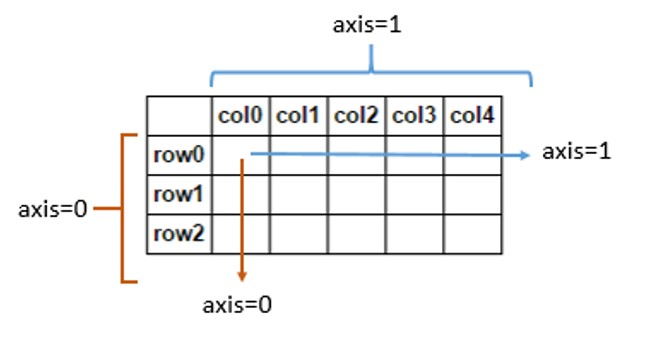

In [3]:
import pandas as pd
import numpy as np
df3 = pd.DataFrame(np.random.randint(1, 10, (5,5)), columns=['a', 'b', 'c', 'd', 'e'], index=['A', 'B', 'C', 'D', 'E'])
df3.iloc()[1, 1:4] = np.NaN
print(df3)
print("-----------------") 
mapping_dict = {'a':'Python', 'b':'Python', 'c':'Java', 'd':'C', 'e':'Java'}
#df3.columns = df3.columns.map(lambda x:mapping_dict[x])
#print("-----------------") 
#print(df3)
print("size")
print(df3.groupby(mapping_dict, axis=1).size())
print("count")
print(df3.groupby(mapping_dict, axis=1).count())
print("sum")
print(df3.groupby(mapping_dict, axis=1).sum())


   a    b    c    d  e
A  4  4.0  6.0  4.0  4
B  1  NaN  NaN  NaN  9
C  3  7.0  7.0  3.0  8
D  2  1.0  3.0  3.0  9
E  5  9.0  6.0  6.0  5
-----------------
size
C         1
Java      2
Python    2
dtype: int64
count
   C  Java  Python
A  1     2       2
B  0     1       1
C  1     2       2
D  1     2       2
E  1     2       2
sum
     C  Java  Python
A  4.0  10.0     8.0
B  0.0   9.0     1.0
C  3.0  15.0    10.0
D  3.0  12.0     3.0
E  6.0  11.0    14.0


### count vs size(補)

In [38]:
df = pd.DataFrame({"Name":["Alice", "Bob", "Mallory", "Mallory", "Bob" , "Mallory"],
                 "City":["Seattle", "Seattle", "Portland", "Seattle", "Seattle", "Portland"],
                "Val":[4,3,3,np.nan,np.nan,4]})
print(df)
print("=======================")
# as_index=False 可使得index為自動流水號
dfg = df.groupby(["Name", "City"],as_index=False).count()#不包含nan 這樣組合且欄位內容存在的幾次
print(dfg)      
print("=======================")
dfg = df.groupby(["Name", "City"],as_index=False).size()#包含nan 這樣的組合出現幾次
print(dfg)    

      Name      City  Val
0    Alice   Seattle  4.0
1      Bob   Seattle  3.0
2  Mallory  Portland  3.0
3  Mallory   Seattle  NaN
4      Bob   Seattle  NaN
5  Mallory  Portland  4.0
      Name      City  Val
0    Alice   Seattle    1
1      Bob   Seattle    1
2  Mallory  Portland    2
3  Mallory   Seattle    0
      Name      City  size
0    Alice   Seattle     1
1      Bob   Seattle     2
2  Mallory  Portland     2
3  Mallory   Seattle     1


### axis=0 求均值

In [11]:
import pandas as pd
import numpy as np
empl_df = pd.DataFrame({
    'Name': ["Jon", "Jon", "Mike", "Luna", "Sam", "Aliza"],
    'Age': [30, 33, 35, 30, 30, 31],
    'Weight(KG)': [75, 75, 80, 70, 73, 70],
    'Height(meters)': [1.7, 1.7, 1.85, 1.75, np.nan, 1.75],
    'Salary($)': [3300, 3500, 4000, 3050, np.nan, 3700]
})
print("The Employee DataFrame is:")
print(empl_df,"\n")

print("The DataFrame with mean values of each column is:")
print(empl_df.groupby('Name',axis=0).sum())
print("========================")
print(empl_df.groupby('Name',axis=0).count())
print("========================")
print(empl_df.groupby('Name',axis=0).size())

The Employee DataFrame is:
    Name  Age  Weight(KG)  Height(meters)  Salary($)
0    Jon   30          75            1.70     3300.0
1    Jon   33          75            1.70     3500.0
2   Mike   35          80            1.85     4000.0
3   Luna   30          70            1.75     3050.0
4    Sam   30          73             NaN        NaN
5  Aliza   31          70            1.75     3700.0 

The DataFrame with mean values of each column is:
       Age  Weight(KG)  Height(meters)  Salary($)
Name                                             
Aliza   31          70            1.75     3700.0
Jon     63         150            3.40     6800.0
Luna    30          70            1.75     3050.0
Mike    35          80            1.85     4000.0
Sam     30          73            0.00        0.0
       Age  Weight(KG)  Height(meters)  Salary($)
Name                                             
Aliza    1           1               1          1
Jon      2           2               2          2


### axis=1 求均值

In [25]:
import pandas as pd

empl_df = pd.DataFrame({  
    'A': [30, 33, 35, 30, 30, 31],
    'B': [75, 75, 80, 70, 73, 70],
    'C': [80, 90, 75, 83, 97, 66],
    'D': [57, 83, 72, 96, 88, 25]
},index=["Ken","Vivin","Lindy","Iris","Gigi","Lucy"])
print("The Employee DataFrame is:")
print(empl_df,"\n")
mapping_dict = {'A':'Python', 'B':'Python', 'C':'Java', 'D':'C++'}
print("The DataFrame with mean values of each row is:")
print(empl_df.groupby(mapping_dict,axis=1).mean())

The Employee DataFrame is:
        A   B   C   D
Ken    30  75  80  57
Vivin  33  75  90  83
Lindy  35  80  75  72
Iris   30  70  83  96
Gigi   30  73  97  88
Lucy   31  70  66  25 

The DataFrame with mean values of each row is:
        C++  Java  Python
Ken    57.0  80.0    52.5
Vivin  83.0  90.0    54.0
Lindy  72.0  75.0    57.5
Iris   96.0  83.0    50.0
Gigi   88.0  97.0    51.5
Lucy   25.0  66.0    50.5


### 以多層次(MultiIndex)的 Column 名稱進行分組

In [18]:
import pandas as pd
import numpy as np
a = pd.MultiIndex.from_arrays(
    [['Python', 'Java', 'Python', 'Java', 'Python'], ['A', 'A', 'B', 'C', 'B']],
    names=['language', 'index']) ##雙主鍵(MultiIndex)
df4 = pd.DataFrame(np.random.randint(1, 10, (5, 5)), columns=a)
print(df4)
print("-----------------")
print(df4.groupby(level='language', axis=1).sum( )) #指定要群組的是language
print("-----------------")
print(df4.groupby(level='index', axis=1).sum( )) #指定要群組的是index


language Python Java Python Java Python
index         A    A      B    C      B
0             6    6      7    9      5
1             7    9      9    5      2
2             4    9      2    6      3
3             6    4      6    3      9
4             5    2      7    3      7
-----------------
language  Java  Python
0           15      18
1           14      18
2           15       9
3            7      21
4            5      19
-----------------
index   A   B  C
0      12  12  9
1      16  11  5
2      13   5  6
3      10  15  3
4       7  14  3


## 功能聚合與重新採樣
+ 我們可針對數值資料進行各種計算。
+ 聚合代表 .agg( ) 這個動作：
   + 可以整併各種計算為多個 column 輸出。
   + 分組後也可以利用可以進行各組的資料計算。
+ 我們可針對物件進行 resample( ) 動作進行重新採樣，藉此調整日期時間資料的出現頻率。
+ [time offset](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)

### pandas028原型

In [71]:
import pandas as pd
df = pd.read_csv('salesv3.csv',encoding="utf-8")
df["date"] = pd.to_datetime(df['date'])
print(df.head( ))
print("-------------")


   account number                         name       sku  quantity  \
0          740150                   Barton LLC  B1-20000        39   
1          714466              Trantow-Barrows  S2-77896        -1   
2          218895                    Kulas Inc  B1-69924        23   
3          307599  Kassulke, Ondricka and Metz  S1-65481        41   
4          412290                Jerde-Hilpert  S2-34077         6   

   unit price  ext price                date  
0       86.69    3380.91 2014-01-01 07:21:51  
1       63.16     -63.16 2014-01-01 10:00:47  
2       90.70    2086.10 2014-01-01 13:24:58  
3       21.05     863.05 2014-01-01 15:05:22  
4       83.21     499.26 2014-01-01 23:26:55  
-------------


In [41]:
import pandas028
test = (pandas028.df['date'] >= '2014-01-01') & (pandas028.df['date'] <= '2014-01-31') & (pandas028.df['name'] =='Barton LLC')
print("first:",pandas028.df[test][['name','ext price','date']])
print("sum:",pandas028.df[test]['ext price'].sum())
print("-------------")
a=pandas028.df.set_index('date').resample('M')["ext price"].sum( ) #日期重新採樣 使用(M)月結點
print(a)
print("-------------")
b=pandas028.df.set_index('date').groupby('name')["ext price"].resample("M").sum()
print(b)
c=pandas028.df.set_index('date').groupby('name')["ext price"].resample("A-DEC").sum()#表示12月作為結束的一整年
print(c)

first:            name  ext price                date
0    Barton LLC    3380.91 2014-01-01 07:21:51
85   Barton LLC     156.80 2014-01-20 01:48:47
91   Barton LLC      68.06 2014-01-20 13:27:52
96   Barton LLC     181.82 2014-01-21 21:21:01
99   Barton LLC     608.20 2014-01-22 16:33:51
105  Barton LLC     658.70 2014-01-24 00:00:35
117  Barton LLC     975.24 2014-01-27 05:48:37
125  Barton LLC     147.84 2014-01-28 16:28:29
sum: 6177.57
-------------
date
2014-01-31    185361.66
2014-02-28    146211.62
2014-03-31    203921.38
2014-04-30    174574.11
2014-05-31    165418.55
2014-06-30    174089.33
2014-07-31    191662.11
2014-08-31    153778.59
2014-09-30    168443.17
2014-10-31    171495.32
2014-11-30    119961.22
2014-12-31    163867.26
Freq: M, Name: ext price, dtype: float64
-------------
name        date      
Barton LLC  2014-01-31     6177.57
            2014-02-28    12218.03
            2014-03-31     3513.53
            2014-04-30    11474.20
            2014-05-31    10220.

In [8]:
import pandas028
import datetime
a=pandas028.df.groupby(['name', pandas028.pd.Grouper(key='date', freq='M')])['ext price'].sum( ) ## 每個月底
print("-------------")
print(a)
print("-------------")
b=pandas028.df.groupby(['name', pandas028.pd.Grouper(key='date', freq='A-DEC')])['ext price'].sum( )#A-DEC 採樣頻率為12月底
print(b)

TimeGrouper(key='date', freq=<MonthEnd>, axis=0, sort=True, closed='right', label='right', how='mean', convention='e', origin='start_day')
-------------
name        date      
Barton LLC  2014-01-31     6177.57
            2014-02-28    12218.03
            2014-03-31     3513.53
            2014-04-30    11474.20
            2014-05-31    10220.17
                            ...   
Will LLC    2014-08-31     1439.82
            2014-09-30     4345.99
            2014-10-31     7085.33
            2014-11-30     3210.44
            2014-12-31    12561.21
Name: ext price, Length: 240, dtype: float64
-------------
name                             date      
Barton LLC                       2014-12-31    109438.50
Cronin, Oberbrunner and Spencer  2014-12-31     89734.55
Frami, Hills and Schmidt         2014-12-31    103569.59
Fritsch, Russel and Anderson     2014-12-31    112214.71
Halvorson, Crona and Champlin    2014-12-31     70004.36
Herman LLC                       2014-12-31     828

### 功能聚合

In [42]:
import pandas028
a=pandas028.df[["ext price", "quantity"]].sum( )
b=pandas028.df["unit price"].mean( )
print(a)
print("-----------")
print(b)
print("-----------")
c=pandas028.df[["ext price", "quantity", "unit price"]].agg(['sum', 'mean']) # 希望同時計算 sum 與 mean
print(c)
print("-----------")

ext price    2018784.32
quantity       36463.00
dtype: float64
-----------
55.00752666666659
-----------
         ext price      quantity    unit price
sum   2.018784e+06  36463.000000  82511.290000
mean  1.345856e+03     24.308667     55.007527
-----------


### value_counts 統計出現次數

In [47]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'X': [1, 2, 3, np.nan, 3],
                   'Y': [4, np.nan, 8, np.nan, 3]})
print("DataFrame:")
print(df)
absolute_counts=df["X"].value_counts()
absolute_counts_nan=df["X"].value_counts(dropna=False)#表示顯示nan的出現次數 預設為True不顯示nan
print("Frequencies of elements of X column:")
print(absolute_counts)
print(absolute_counts_nan)
print(absolute_counts.index[0]) # 取得出現頻率最高的

DataFrame:
     X    Y
0  1.0  4.0
1  2.0  NaN
2  3.0  8.0
3  NaN  NaN
4  3.0  3.0
Frequencies of elements of X column:
3.0    2
1.0    1
2.0    1
Name: X, dtype: int64
3.0    2
1.0    1
2.0    1
NaN    1
Name: X, dtype: int64
3.0


In [6]:
import pandas028
## 分別設定不同欄位做甚麼
a=pandas028.df.agg({'ext price': ['sum', 'mean'], 'quantity': ['sum', 'mean'], 'unit price': ['mean']})
get_max = lambda x: x.value_counts(dropna=False).index[0]
b=pandas028.df.agg({'ext price': ['sum', 'mean'], 'quantity': ['sum', 'mean'], 'unit price': ['mean'], 'sku': [get_max]})
print(a)
print("-----------")
print(b)
print("-----------")
get_max.__name__ = "most frequent" #設定名稱為most frequent
c=pandas028.df.agg({'ext price': ['sum', 'mean',get_max], 'quantity': ['sum', 'mean'], 'unit price': ['mean'], 'sku': [get_max]})
print(c)
print("-----------")


         ext price      quantity  unit price
sum   2.018784e+06  36463.000000         NaN
mean  1.345856e+03     24.308667   55.007527
-----------
             ext price      quantity  unit price       sku
sum       2.018784e+06  36463.000000         NaN       NaN
mean      1.345856e+03     24.308667   55.007527       NaN
<lambda>           NaN           NaN         NaN  S2-77896
-----------
                  ext price      quantity  unit price       sku
sum            2.018784e+06  36463.000000         NaN       NaN
mean           1.345856e+03     24.308667   55.007527       NaN
most frequent  1.484000e+03           NaN         NaN  S2-77896
-----------


### Q1

In [8]:
import pandas027
import numpy as np
print(pandas027.df)
grouped = pandas027.df.groupby('Team')
print(type(grouped))
print("===========================")
print(grouped.first())
print("===========================")
print(grouped.agg("size"))#注意有小寫kings
print(grouped.agg(np.size))#每個欄位都填上相對應的size
print(grouped.agg(lambda x:np.size(x)))


      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
2   Devils     2  2014     863
3   Devils     3  2015     673
4    Kings     3  2014     741
5    kings     4  2015     812
6    Kings     1  2016     756
7    Kings     1  2017     788
8   Riders     2  2016     694
9   Royals     4  2014     701
10  Royals     1  2015     804
11  Riders     2  2017     690
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
        Rank  Year  Points
Team                      
Devils     2  2014     863
Kings      3  2014     741
Riders     1  2014     876
Royals     4  2014     701
kings      4  2015     812
Team
Devils    2
Kings     3
Riders    4
Royals    2
kings     1
dtype: int64
        Rank  Year  Points
Team                      
Devils     2     2       2
Kings      3     3       3
Riders     4     4       4
Royals     2     2       2
kings      1     1       1
        Rank  Year  Points
Team                      
Devils     2     2       2
Kings

In [5]:
import pandas027
import numpy as np
grouped = pandas027.df.groupby('Team')
print(grouped.first())
print(grouped['Points'].agg([np.sum, np.mean, np.std]))

        Rank  Year  Points
Team                      
Devils     2  2014     863
Kings      3  2014     741
Riders     1  2014     876
Royals     4  2014     701
kings      4  2015     812
         sum        mean         std
Team                                
Devils  1536  768.000000  134.350288
Kings   2285  761.666667   24.006943
Riders  3049  762.250000   88.567771
Royals  1505  752.500000   72.831998
kings    812  812.000000         NaN


# 刪除與修改取代資料

In [30]:
import pandas as pd
filterList = ['年度','經常性薪資-女/男','專業人員-女/男','技術員及助理專業人員-女/男','事務支援人員-女/男',
 '服務及銷售工作人員-女/男','技藝_機械設備操作及組裝人員-女/男','基層技術工及勞力工-女/男']
data = pd.read_csv('HW18__Data.csv')
data.drop(columns=filterList,inplace=True)#inplace=True 可修改原始資
data.replace(to_replace=r"…|—",value="0",regex=True,inplace=True)
data.rename(columns={'經常性薪資-薪資': '經常性',
'專業人員-薪資': '專業人員',
'技術員及助理專業人員-薪資': '技術員及助理',
'事務支援人員-薪資': '事務人員',
'服務及銷售工作人員-薪資': '服務銷售',
'技藝_機械設備操作及組裝人員-薪資': '機械設備操作',
'基層技術工及勞力工-薪資': '基層勞力'},inplace=True)
print(data.head())

         行業別    經常性   專業人員 技術員及助理   事務人員   服務銷售 機械設備操作   基層勞力
0   工業及服務業部門  27055  34003  28646  26068  25012  25338  22824
1       工業部門  26860  33788  28103  25906  25811  24919  22784
2   礦業及土石採取業  26170  35768  27744  23441  23625  26988  22440
3   石油及天然氣礦業  27696  37125  25313  23625  23625  23625      0
4  砂、石及黏土採取業  25661  30000  29185  23405      0  27629  22440
